In [4035]:
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import SelectKBest, f_regression
from scipy.stats import f
import matplotlib.pyplot as plt

In [4036]:
df = pd.read_csv('/Users/PJizzle/Code/Data Mining Project/vgsales.csv')

In [4037]:
df = df.drop('NA_Sales', axis=1)

In [4038]:
df = df.drop('EU_Sales', axis=1)

In [4039]:
df = df.drop('JP_Sales', axis=1)

In [4040]:
df

,Year,Genre,Global_Sales,Rank
0,2006.0,Sports,82.74,1
1,1985.0,Platform,40.24,2
2,2008.0,Racing,35.82,3
3,2009.0,Sports,33.00,4
4,1996.0,Role-Playing,31.37,5
5,1989.0,Puzzle,30.26,6
6,2006.0,Platform,30.01,7
7,2006.0,Misc,29.02,8
8,2009.0,Platform,28.62,9
9,1984.0,Shooter,28.31,10


In [4041]:
classes = pd.Series(df['Genre'].unique(), name='Genre')

In [4042]:
classes

0           Sports
1         Platform
2           Racing
3     Role-Playing
4           Puzzle
5             Misc
6          Shooter
7       Simulation
8           Action
9         Fighting
10       Adventure
11        Strategy
Name: Genre, dtype: object

In [4043]:
classes=classes.to_frame()

In [4044]:
type(classes)

pandas.core.frame.DataFrame

In [4045]:
classes['Sports'] = (classes['Genre'] == 'Sports') + 0
classes['Platform'] = (classes['Genre'] == 'Platform') + 0
classes['Racing'] = (classes['Genre'] == 'Racing') + 0
classes['Role-Playing'] = (classes['Genre'] == 'Role-Playing') + 0
classes['Puzzle'] = (classes['Genre'] == 'Puzzle') + 0
classes['Misc'] = (classes['Genre'] == 'Misc') + 0
classes['Shooter'] = (classes['Genre'] == 'Shooter') + 0
classes['Simulation'] = (classes['Genre'] == 'Simulation') + 0
classes['Action'] = (classes['Genre'] == 'Action') + 0
classes['Fighting'] = (classes['Genre'] == 'Fighting') + 0
classes['Adventure'] = (classes['Genre'] == 'Adventure') + 0
classes['Strategy'] = (classes['Genre'] == 'Strategy') + 0

In [4046]:
df = df.dropna()

In [4047]:
df.isnull().values.any()

False

In [4048]:
df2 = pd.merge(df, classes)

In [4049]:
df2
len(df2)

16327

In [4050]:
df_fighting = (df2['Year'] == 2010) & (df2['Genre'] == 'Adventure')
fighting2015 = df2[df_fighting]
type(fighting2015)

pandas.core.frame.DataFrame

In [4051]:
fighting2015 = fighting2015.reset_index()


In [4052]:
fighting2015.index = fighting2015.index + 1
fighting2015 = fighting2015.reset_index()
fighting2015 = fighting2015.drop('index', axis=1)
fighting2015.head()

,level_0,Year,Genre,Global_Sales,Rank,Sports,Platform,Racing,Role-Playing,Puzzle,Misc,Shooter,Simulation,Action,Fighting,Adventure,Strategy
0,1,2010.0,Adventure,3.12,448,0,0,0,0,0,0,0,0,0,0,1,0
1,2,2010.0,Adventure,0.76,2691,0,0,0,0,0,0,0,0,0,0,1,0
2,3,2010.0,Adventure,0.67,3016,0,0,0,0,0,0,0,0,0,0,1,0
3,4,2010.0,Adventure,0.58,3497,0,0,0,0,0,0,0,0,0,0,1,0
4,5,2010.0,Adventure,0.53,3800,0,0,0,0,0,0,0,0,0,0,1,0


In [4053]:
X = fighting2015[['level_0']]
X.shape

(154, 1)

In [4054]:
df_NoYear = (df2['Year'] == 2010) | (df2['Genre'] == 'Adventure')
df_New = df2[df_NoYear]
type(df_New)


pandas.core.frame.DataFrame

In [4055]:
y = fighting2015['Global_Sales']

In [4056]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y)
x2_train, x2_test, y2_train, y2_test = sklearn.model_selection.train_test_split(X,y)

In [4057]:
reg = linear_model.LinearRegression()
reg2 = linear_model.LinearRegression()

In [4058]:
reg.fit(np.log(1+x_train), np.log(y_train))
reg2.fit(np.log(1+x2_train), np.log(y2_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [4059]:
y_pred = np.exp(reg.predict(np.log(1+x_test)))
y2_pred = np.exp(reg2.predict(np.log(1+x2_test)))

In [4060]:
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

print("variance score: %.2f" % r2_score(y2_test, y2_pred))

Variance score: 0.81
Mean squared error: 0.00
variance score: 0.91


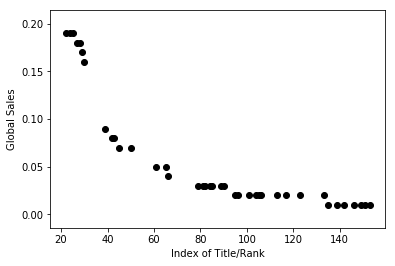

In [4061]:
plt.scatter(x_test, y_test,  color='black')
plt.xlabel('Index of Title/Rank')
plt.ylabel('Global Sales')
plt.show()

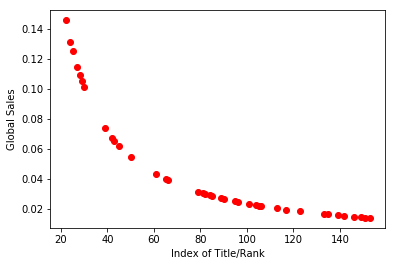

In [4062]:
plt.plot(x_test, y_pred,'o', color='red', linewidth=3)
plt.xlabel('Index of Title/Rank')
plt.ylabel('Global Sales')
plt.show()

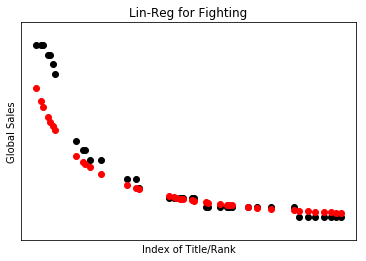

In [4063]:
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, 'o', color='red', linewidth=2)
plt.xticks(())
plt.yticks(())
plt.xlabel('Index of Title/Rank')
plt.ylabel('Global Sales')
plt.title('Lin-Reg for Fighting')
plt.show()

In [4064]:
reg.coef_

array([-1.22983822])

In [4065]:
reg2.coef_

array([-1.2618144])

In [4066]:
reg.intercept_

1.9290604864988081

In [4067]:
reg2.intercept_

2.0576696124450145

In [4068]:
F = ((((r2_score(y2_test, y2_pred))-(r2_score(y_test, y_pred)))/1)/((r2_score(y_test, y_pred))/16000))
alpha = 0.05
p_value = stats.f.cdf(F, 1, 16000)
print(p_value)

1.0
